
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

* Nadia Finzi
* Roxana Noelia Villafañe
* María Roberta Devesa
* Ivana Feldfeber
* Ezequiel Kinigsberg

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
sns.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)
original = df

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

### Primera aproximación a los datos

Analizamos los valores posibles de cada columna y hallamos algunos outliers.

In [ ]:
print(f'Hay {len(df)} filas')

Hay 6095 filas


In [ ]:
df['profile_gender'].value_counts()

Hombre    5122
Mujer      942
Otros       31
Name: profile_gender, dtype: int64

Notamos que hay filas con respuestas que no son lenguajes de programación en la columna **`tools_programming_language`**

In [ ]:
#pd.unique(df[(df.tools_programming_languages.notna()) & (df.tools_programming_languages.str.contains("no", case=False))].tools_programming_languages)
pd.unique(df[(df.tools_programming_languages.notna()) & (df.tools_programming_languages.str.contains('^no |no$|no ', case=False))].tools_programming_languages)


array(['Ninguno', 'No', 'No aplica (Mule)', 'no programo soy recruiter',
       'Ninguno, laburo pedorro donde no aprendo ni puedo usar nada interesante',
       '.NET, CSS, HTML, Javascript, PHP, TypeScript, Arduino',
       'Ninguno de los anteriores', 'No programo',
       'Ninguno de los anteriores, Terraform, Cloudformation',
       'C#, Ninguno de los anteriores',
       'Ninguno de los anteriores, Qlikview', 'no aplica',
       '.NET, HTML, Ninguno de los anteriores',
       'Ninguno de los anteriores, ACL',
       'SQL, Ninguno de los anteriores, Genexus',
       'SQL, Ninguno de los anteriores',
       'CSS, HTML, Javascript, PHP, SQL, HTML y CSS no son  lenguajes de programación',
       'No es un lenguaje pero RPA',
       '.NET, Bash/Shell, C#, CSS, HTML, Javascript, Python, SQL, TypeScript, .NET no es un lenguaje!',
       'C++, C#, Ninguno de los anteriores', 'No aplica'], dtype=object)

In [ ]:
df[["salary_monthly_BRUTO", "salary_monthly_NETO"]].describe()

,salary_monthly_BRUTO,salary_monthly_NETO
count,6.095000e+03,5.883000e+03
mean,1.240585e+05,9.490795e+04
std,1.229124e+05,9.686226e+04
min,1.000000e+00,1.000000e+00
25%,6.159500e+04,5.148000e+04
50%,9.600000e+04,7.800000e+04
75%,1.450000e+05,1.060000e+05
max,2.180000e+06,2.080000e+06


In [ ]:
pd.unique(df.work_people_in_charge_of.sort_values())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   27,   28,   30,   31,   35,   36,   38,
         40,   45,   50,   55,   59,   60,   70,   76,   80,   90,  100,
        110,  120,  138,  150,  170,  300, 2500])

In [ ]:
df.profile_years_experience.max()

115.0

In [ ]:
df[df.profile_age >= 90]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
1659,Hombre,567,Argentina,Ciudad Autónoma de Buenos Aires,20.0,15.0,3.0,6,Universitario,Completado,Ingeniería en Sistemas de Información,UADE - Universidad Argentina De la Empresa,"Sí, de forma particular",No,Sí,Hombre orquesta,"Linux, Windows Server","Bash/Shell, CSS, HTML, Python, Asp","Bootstrap, Flask","MariaDB, MySQL, PostgreSQL, SQLite",Ninguna,"Android Studio, Nano, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Porcentaje de mi sueldo,Full-Time,130000.0,100000.0,NaN,3,3,De uno a tres sueldos,Performance de la compañía,No,0.0,0,En mi trabajo actual,¿Qué les importa?,Social,Sí,2001-5000,Otras industrias,3,1,Ninguna de las anteriores,NaN
5752,Hombre,52000,Argentina,Jujuy,9.0,9.0,9.0,3,Universitario,Completado,Analista Programador Universitario,UNJu - Universidad Nacional de Jujuy,No,Sí,Sí,Developer,"Amazon Web Services, Docker, Linux, Windows Se...","HTML, Java, Javascript, SQL",".NET Core, Angular, Flutter, Hibernate, jQuery...","MariaDB, Microsoft SQL Server, MongoDB, MySQL,...","JUnit, Postman","Eclipse, IntelliJ, Visual Studio, Visual Studi...",Windows,Android,No,0.0,Neto,Full-Time,40000.0,52000.0,NaN,3,3,No,No recibo bono,Dos,25.0,7,Jamás,Heterosexual,Visual,No,11-50,Servicios / Consultoría de Software / Digital,8,8,Horarios flexibles,NaN


## Limpieza y exploración de datos

### Filtrado de sueldos coherentes

- Renombramos algunas columnas.
- Creamos columna de retenciones.
- Creamos columna de % sueldo retenido.
- Separamos los sueldos en dolarizados y pesificados, y a la vez los subidivimos en sueldos part-time y full-time

In [ ]:
sueldos_filtrados = df.rename(columns={'profile_years_experience': 'experiencia', 
                                       'work_years_in_company': 'anios_en_compania', 
                                       'work_years_in_current_position': 'anios_en_posicion_actual', 
                                       'salary_monthly_BRUTO': 'bruto', 
                                       'salary_monthly_NETO': 'neto', 
                                       'salary_in_usd': 'dolarizado',
                                        })
sueldos_filtrados['retenciones'] = sueldos_filtrados.bruto - sueldos_filtrados.neto
sueldos_filtrados['porcentaje_retenido'] = sueldos_filtrados.retenciones * 100 / sueldos_filtrados.bruto

In [ ]:
print(f'Percentil 95 del porcentaje de retenciones: {round(sueldos_filtrados.porcentaje_retenido.quantile(0.95),2)}%')

Percentil 95 del porcentaje de retenciones: 35.99%


In [ ]:
len(sueldos_filtrados)

6095

Siendo el sueldo una variable fundamental para nuestro análisis, nos quedaremos con aquellos valores que tengan sentido:


*   El sueldo *bruto* debería ser mayor que el *neto*.
*   Las *retenciones* deberían rondar cierto porcentaje, pero nunca ser negativas. Estableceremos el mínimo en 0% y el máximo acorde al cuantil 0.95 (que coincide con el 36% de retención). 



---


*Bibliografía consultada:*

* [Límite de descuentos](https://www.dt.gob.cl/portal/1628/w3-article-60214.html)


In [ ]:
sueldos_filtrados = sueldos_filtrados[(sueldos_filtrados.porcentaje_retenido > 0) & 
                                      (sueldos_filtrados.porcentaje_retenido <= sueldos_filtrados.porcentaje_retenido.quantile(0.95))]


In [ ]:
print(f'Luego de estos filtros, tenemos {len(sueldos_filtrados)} filas')

Luego de estos filtros, tenemos 5165 filas


Con el criterio del porcentaje retenido, filtramos el 15.258408531583267 % de los datos, y el gráfico quedó así:


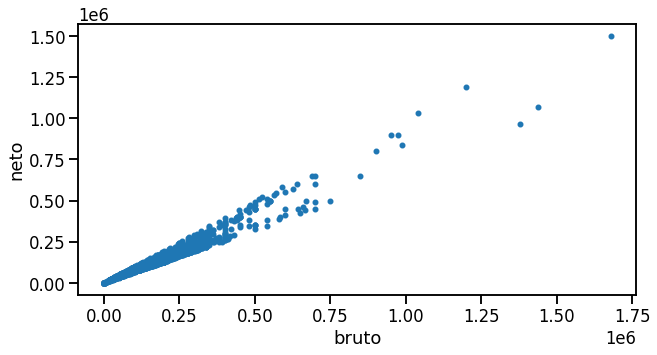

In [ ]:
print("Con el criterio del porcentaje retenido, filtramos el", (1-(len(sueldos_filtrados)/len(df)))*100, "% de los datos, y el gráfico quedó así:")
sueldos_filtrados.plot.scatter(x='bruto', y='neto', figsize=(10,5));

Nos quedamos solamente con la gente que en principio trabaja en blanco, ya que se le retiene al menos algo (es decir, el sueldo bruto es mayor al neto), y ese porcentaje a su vez es lógico.

In [ ]:
sueldos_filtrados.neto.describe()

count    5.165000e+03
mean     8.949795e+04
std      7.440265e+04
min      1.700000e+01
25%      5.300000e+04
50%      7.700000e+04
75%      1.040000e+05
max      1.500000e+06
Name: neto, dtype: float64

In [ ]:
def cuantil(q):
  return sueldos_filtrados.neto.quantile(q) 

In [ ]:
cuantil(0.05)

30000.0

In [ ]:
sueldos_filtrados = sueldos_filtrados[sueldos_filtrados.neto >= 29800]

Por último, filtramos el 5% inferior de sueldos netos, ya que representaban sueldos extremedamente bajos, que no cubrirían ni un sueldo mínimo. 

### Armado de DF con info por lenguaje

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'experiencia',	'anios_en_compania',	
                    'anios_en_posicion_actual', 'bruto',	'neto',	'dolarizado', 'work_contract_type']

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower().replace('ninguno de los anteriores', '')
  languages_str=languages_str.replace('ninguno', '')
  languages_str=languages_str.replace('ninguna', '')

  # Split string into list of items, remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

In [ ]:
df_valido = sueldos_filtrados.copy()
# Create a new column with the list of languages
df_valido.loc[:, 'cured_programming_languages'] = (df_valido
                                                   .tools_programming_languages
                                                   .apply(split_languages))
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = (df_valido.cured_programming_languages
           .apply(pd.Series).stack()
           .reset_index(level=-1, drop=True).to_frame()
           .join(df_valido[relevant_columns])
           .rename(columns={0: 'lenguaje'}))
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,lenguaje,tools_programming_languages,experiencia,anios_en_compania,anios_en_posicion_actual,bruto,neto,dolarizado,work_contract_type,cured_programming_languages
1,html,"HTML, Javascript, Python",5.0,2.0,2.0,79000.0,63000.0,NaN,Full-Time,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",5.0,2.0,2.0,79000.0,63000.0,NaN,Full-Time,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",5.0,2.0,2.0,79000.0,63000.0,NaN,Full-Time,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",15.0,15.0,13.0,130000.0,102000.0,NaN,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",15.0,15.0,13.0,130000.0,102000.0,NaN,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."


**Cantidad de lenguajes únicos**

In [ ]:
len(pd.unique(df_lang.lenguaje))

175

**Agregamos una columna con la cantidad de lenguajes**

In [ ]:
df_lang['lang_count'] = df_lang.cured_programming_languages.apply(len)

**Limpieza de errores en nombres de lenguajes**

In [ ]:
df_lang.loc[(df_lang.lenguaje == 'cliper'),'lenguaje']='clipper'
df_lang.loc[(df_lang.lenguaje.isin(['vb','vb5','vb6', 'vba','vbscript','visual'])),'lenguaje']='vb'
df_lang.loc[(df_lang.lenguaje.isin(['xml', 'xml.','xsl','xslt'])),'lenguaje']='xml'
df_lang.loc[(df_lang.lenguaje.isin(['pl-sql', 'pl/sql','plsql'])),'lenguaje']='sql'
df_lang.loc[(df_lang.lenguaje.isin(['shell', 'bash/shell'])),'lenguaje']='bash'
df_lang.loc[(df_lang.lenguaje.isin(['.net', 'net','asp'])),'lenguaje']='net'
df_lang.loc[(df_lang.lenguaje.isin(['fox','foxpro2.5','vfp'])),'lenguaje']='foxpro'

In [ ]:
df_lang.lenguaje.unique()

array(['html', 'javascript', 'python', 'bash', 'c', 'css', 'java', 'php',
       'sql', 'typescript', 'assembler', 'c#', 'r', 'net', 'delphi', 'vb',
       'scala', 'c++', 'objective-c', 'abap', 'go', 'perl', 'ruby',
       'elixir', 'qlik', 'swift', 'kotlin', 'powershell', 'matlab',
       'vhdl', 'erlang', '4gl', 'clarion', 'no', 'aplica', '(mule)',
       'genexus', 'groovy', 'apex', 'dart', 'cobol', 'actionscript',
       'lua', '', 'clipper', 'programo', 'soy', 'recruiter',
       'powerbuilder', 'basico', 'google', 'apps', 'script', 'rust',
       'scss', 'esql', 'progress', 'yaml', 'smalltalk', 'terraform',
       'hcl', 'laburo', 'pedorro', 'donde', 'aprendo', 'ni', 'puedo',
       'usar', 'nada', 'interesante', 'xamarin', 'fortran', 'oracle',
       'blueprints', '(programación', 'en', 'unreal)', 'yacc', 'lex',
       'regex', 'rpa', 'basic', 'graphql', '-', 'foxpro', 'natural',
       'adabas', 'kdb', 'json', 'clojure', 'gosu', 'robin', 'x++', 'dell',
       'boomi', '/', 'sa

###Elección de lenguajes

Hicimos una curaduría manual de los lenguajes que considerábamos dentro del equipo como válidos, a su vez elegimos eliminar aquellas respuestas que tenían más de 3 espacios, ya que en general los lenguajes de programación populares consisten en una o dos palabras, asumimos que cuando hay más de 3 espacios es porque la persona escribió una frase del estilo "no sé programar" o "html no es un lenguaje de programación".
Eliminamos outliers como 'y', '-', 'laburo', 'lenguaje', '6', 'pero', 'google', 'apps', 'recruiter', 'programo', 'no', 'aplica', etc.
Si bien hubiese sido interesante encontrar una lista de todos los lenguajes de programación existentes y eliminar aquellos valores en nuestra lista que no matcheen con la lista de lenguajes de programación, no pudimos encontrar ninguna lo suficientemente exhaustiva de una fuente confiable.

Luego de los filtros aplicados nos quedamos con 79 lenguajes que consideramos relevantes y representativos del mercado actual, ya que lo que queremos ver es la relación de sueldos con lenguajes de programación.

In [ ]:
interesting_languages = ['assembler', 'cliper', 'clipper', 'cobol', 'fortran', 'ladder', 'plc', 'pascal', 'sas', 'rexx', 'apps', 'android', 'swift', 
                         'solidity', 'bash', 'bash/shell', 'shell', 'script', 'powerscript', 'basic', 'vb', 'vb5', 'vb6', 'vba', 'vbscript', 'visual', 
                         '.net', 'net', 'asp', 'c#', 'elm', 'fox', 'foxpro', 'foxpro2.5', 'vfp', 'apache', 'php', 'css', 'html', 'xml', 'xml.', 'xsl', 
                         'xslt', 'yaml', 'json', 'c++', 'x++', 'rust', 'go', 'c', 'objective-c', 'smalltalk', 'apex', 'javascript', 'react', 'kotlin', 
                         'java', 'scala', 'groovy', 'ruby', 'perl', 'python', 'python', 'r', 'dax', 'regex', 'db', 'esql', 'mongodb', 'nosql', 'oracle', 
                         'pl-sql', 'pl/sql', 'plsql', 'sql', 'bi', 'adabas', 'elixir', 'haskell']
filtered_df = df_lang[df_lang.lenguaje.isin(interesting_languages)].drop(columns=['tools_programming_languages', 'cured_programming_languages'])
#elimina filas con mas de 3 espacios considerando q podria ser un texto como "mi trabajo no es programar" y no un lenguaje 
filtered_df[filtered_df.lenguaje.str.count('\s+').lt(3)]

filtered_df.sample(5)

,lenguaje,experiencia,anios_en_compania,anios_en_posicion_actual,bruto,neto,dolarizado,work_contract_type,lang_count
5064,javascript,5.0,3.0,1.0,112000.0,96000.0,NaN,Full-Time,5
5301,sql,3.0,0.0,0.0,43000.0,34500.0,NaN,Full-Time,6
4749,sql,4.5,4.0,4.0,86000.0,66380.0,NaN,Full-Time,5
510,sql,5.0,2.0,2.0,90000.0,75000.0,Mi sueldo está dolarizado,Full-Time,2
5011,javascript,2.0,0.0,0.0,38000.0,30000.0,NaN,Full-Time,1


In [ ]:
len(interesting_languages)

79

In [ ]:
print("De los", len(pd.unique(df_lang.lenguaje)), "lenguajes originales en", len(df_lang), "filas, nos quedamos con los", len(interesting_languages), "más relevantes que aparecen en", len(filtered_df), "resultados.")

De los 159 lenguajes originales en 14208 filas, nos quedamos con los 79 más relevantes que aparecen en 13200 resultados.


### Conteo de frecuencias de los lenguajes

In [ ]:
def frecuencia_por_lenguaje(df, columna):
  return df[columna].value_counts()\
    .reset_index()\
    .rename(columns={'index': 'lenguaje', columna: 'frecuencia'})

In [ ]:
language_count = frecuencia_por_lenguaje(filtered_df, 'lenguaje')
language_count[:40]


,lenguaje,frecuencia
0,javascript,2000
1,sql,1782
2,html,1462
3,python,1204
4,java,1196
5,css,984
6,bash,817
7,net,679
8,php,678
9,c#,609


### Análisis Part Time y Full time de sueldos dolarizados

Vamos a visualizar en función de los sueldos en dolares, los lenguajes más frecuentes

Part-Time

In [ ]:
print("Hay", len(df_valido[df_valido.dolarizado.notna()]), "personas con el sueldo dolarizado, contra", len(df_valido[df_valido.dolarizado.isna()]), "en pesos.")

Hay 472 personas con el sueldo dolarizado, contra 4447 en pesos.


In [ ]:
dolarizados = filtered_df[filtered_df.dolarizado.notna()]
frec_leng_dolarizados = frecuencia_por_lenguaje(dolarizados, 'lenguaje')
frec_leng_dolarizados.head()

,lenguaje,frecuencia
0,javascript,232
1,html,147
2,python,145
3,sql,132
4,css,113


In [ ]:
dolarizados_part = dolarizados[dolarizados['work_contract_type'] == 'Part-Time']
frec_leng_dolarizados_part = frecuencia_por_lenguaje(dolarizados_part, 'lenguaje')
frec_leng_dolarizados_part.head()


,lenguaje,frecuencia
0,javascript,6
1,java,5
2,sql,4
3,html,4
4,python,3


###Visualizaciones luego de la limpieza

**Sueldos dolarizados part time**

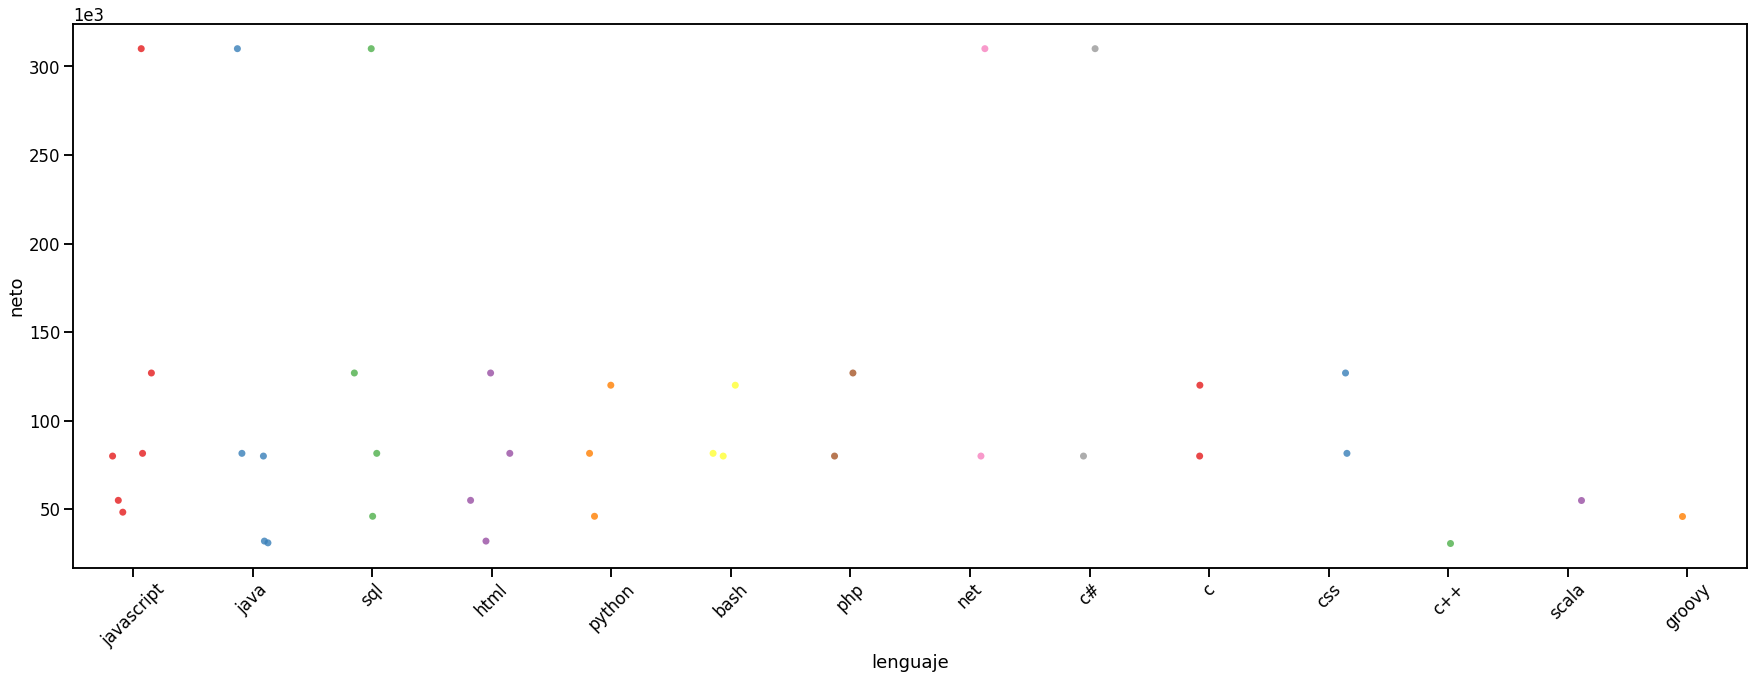

In [ ]:
#ax = dolarizados.plot.scatter(x='lenguaje', y='neto', figsize=(35,10))
plt.subplots(figsize=(30,10))
sns.stripplot(y=dolarizados_part['neto'], x=dolarizados_part['lenguaje'], jitter=0.2, alpha=.8, palette='Set1', size=7, order=frec_leng_dolarizados_part.lenguaje)
plt.ticklabel_format(style='sci',axis='y',scilimits=(3,3))
#plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45);

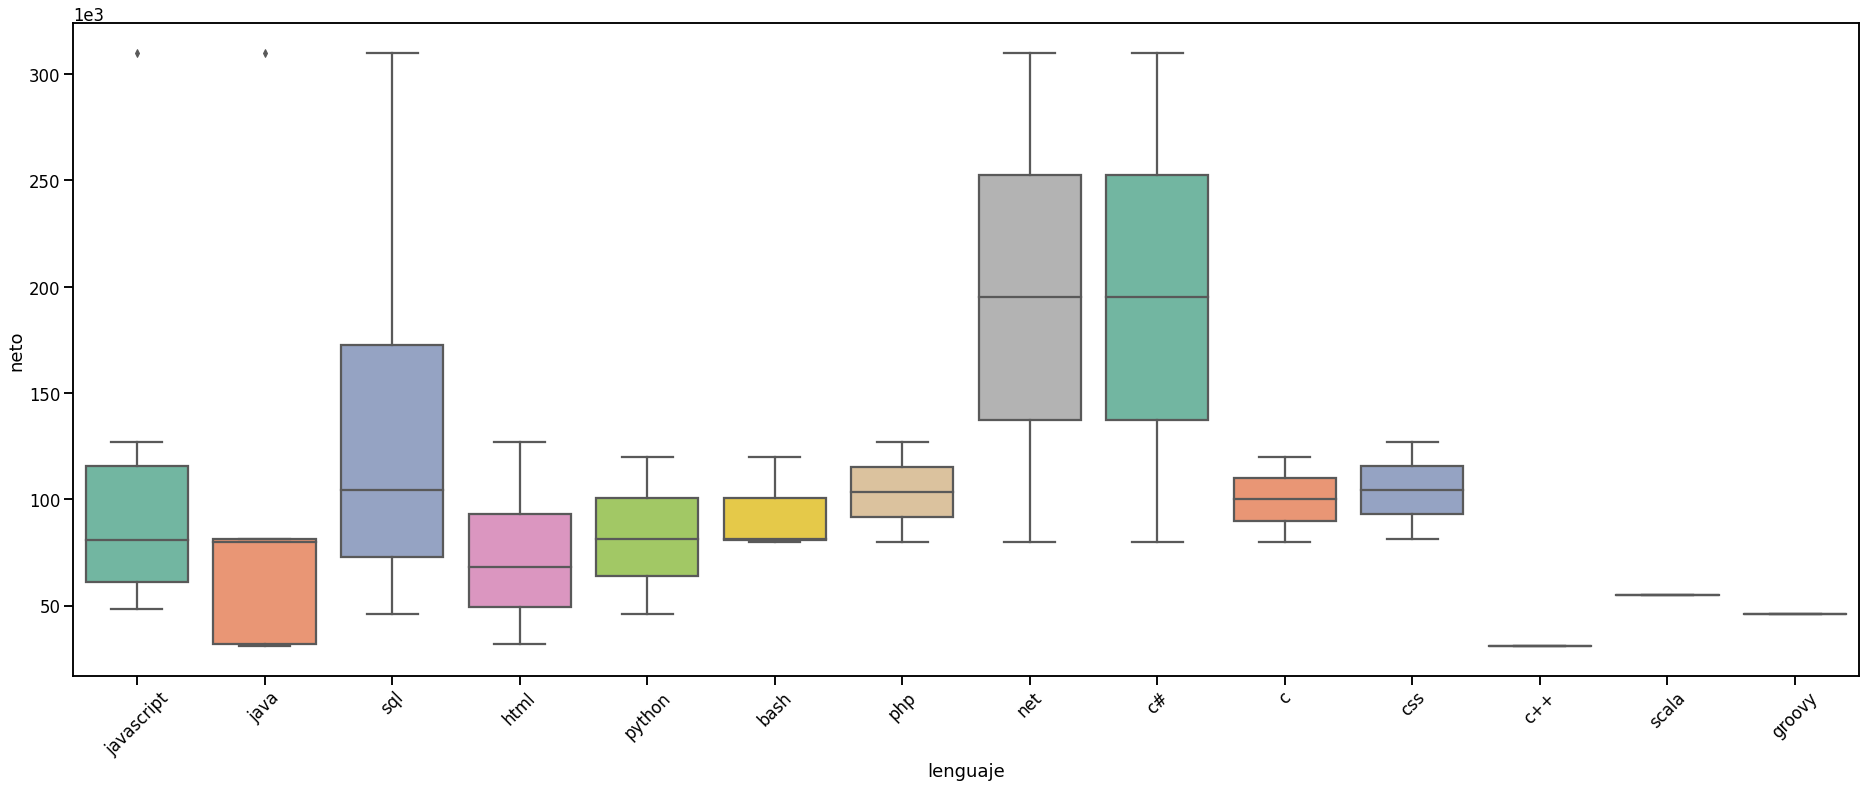

In [ ]:
plt.figure(figsize=(32,12))
sns.boxplot(y='neto', x='lenguaje', data=dolarizados_part, palette='Set2', order=frec_leng_dolarizados_part.lenguaje)
plt.ticklabel_format(style='sci',axis='y',scilimits=(3,3))
plt.xticks(rotation=45);

Sueldos dolarizados full time

In [ ]:
dolarizados = filtered_df[filtered_df.dolarizado.notna()]
frec_leng_dolarizados = frecuencia_por_lenguaje(dolarizados, 'lenguaje')


In [ ]:
dolarizados_full = dolarizados[dolarizados['work_contract_type'] != 'Part-Time']
frec_leng_dolarizados_full = frecuencia_por_lenguaje(dolarizados_full, 'lenguaje')


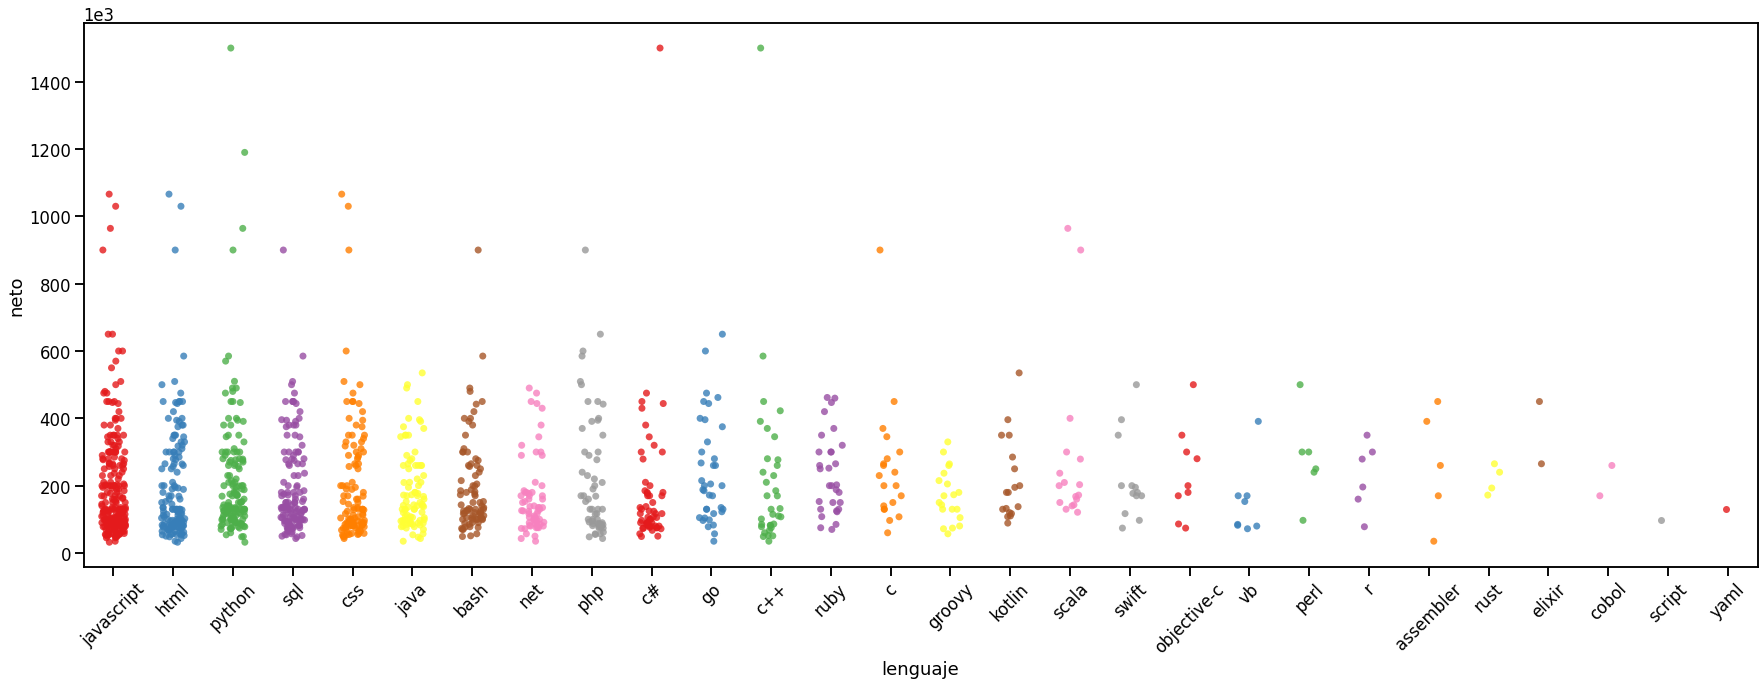

In [ ]:
#ax = dolarizados.plot.scatter(x='lenguaje', y='neto', figsize=(35,10))
plt.subplots(figsize=(30,10))
sns.stripplot(y=dolarizados_full['neto'], x=dolarizados_full['lenguaje'], jitter=0.2, alpha=.8, palette='Set1', size=7, order=frec_leng_dolarizados_full.lenguaje)
plt.ticklabel_format(style='sci',axis='y',scilimits=(3,3))
#plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45);

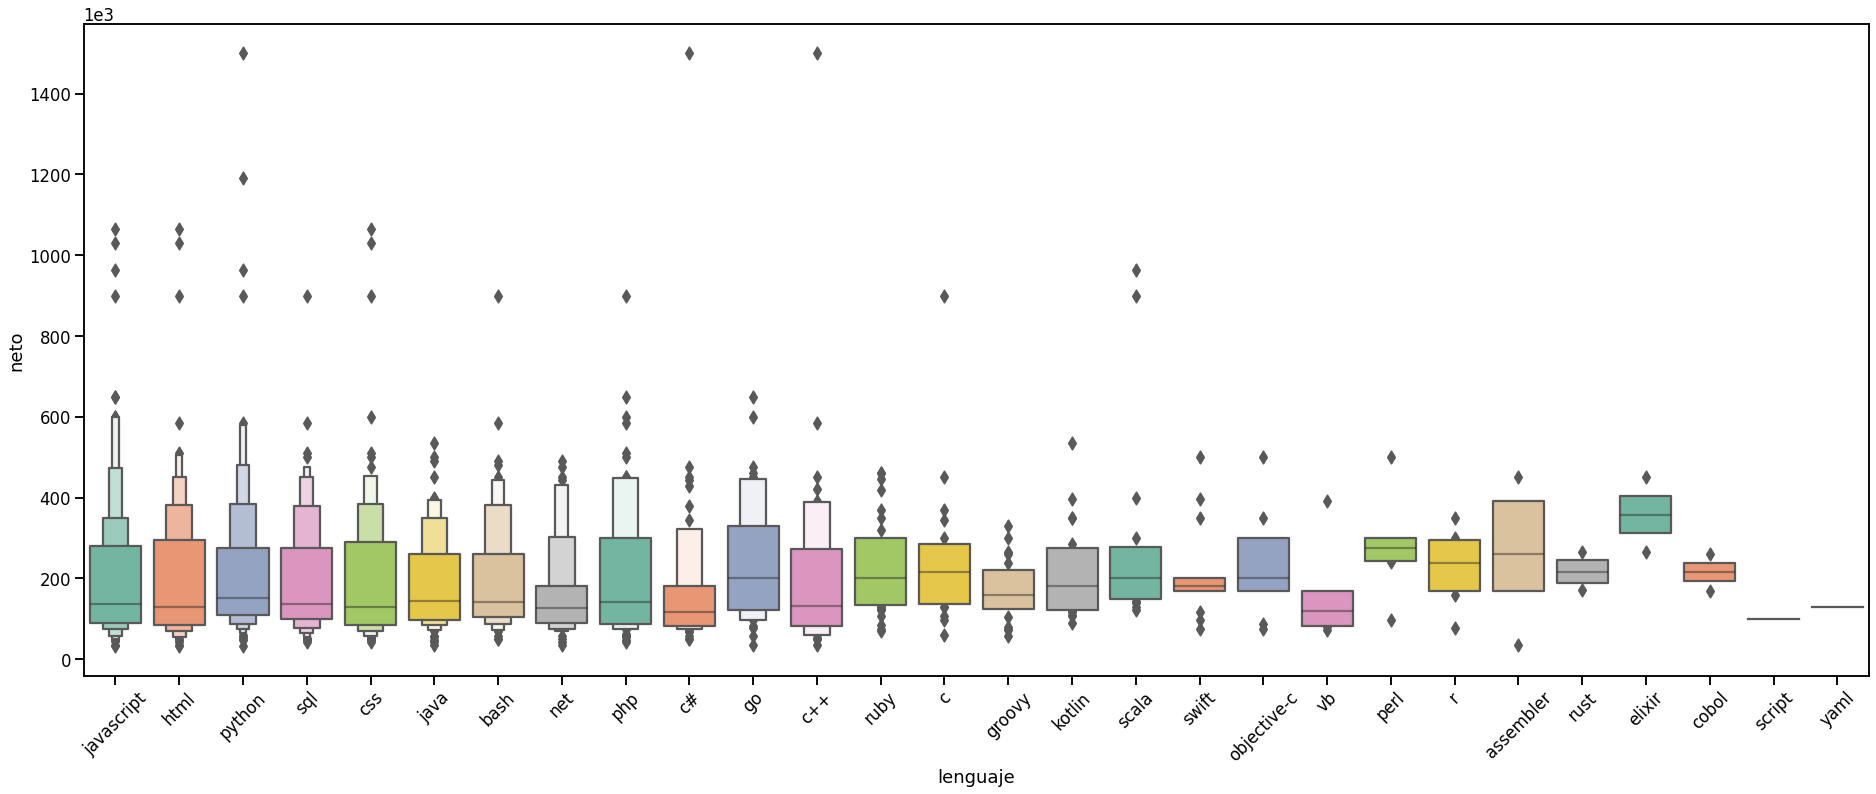

In [ ]:
plt.figure(figsize=(32,12))
sns.boxenplot(y='neto', x='lenguaje', data=dolarizados_full, palette='Set2', order=frec_leng_dolarizados_full.lenguaje)
plt.ticklabel_format(style='sci',axis='y',scilimits=(3,3))
plt.xticks(rotation=45);

In [ ]:
original[original.salary_monthly_NETO == dolarizados.neto.max()]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
2895,Hombre,32,Argentina,Provincia de Buenos Aires,18.0,17.0,5.0,3,Posdoctorado,En curso,Ingeniería en Informática,ITBA - Instituto Tecnológico de Buenos Aires,"Sí, los pagó un empleador",No,Sí,SysAdmin / DevOps / SRE,"Amazon Web Services, IBM Cloud / Watson","C++, C#, Python","jQuery, Laravel","Amazon RDS/Aurora, Google Cloud Storage, IBM D...","Silktest, Visual Studio Coded UI","Android Studio, IPython / Jupyter, Visual Stud...",Windows,Windows,"Sí, activa",650000.0,Bruto,Full-Time,1680000.0,1500000.0,Mi sueldo está dolarizado,3,3,Un sueldo,Performance de la compañía,Uno,5.0,3,Jamás,Heterosexual,NaN,No,5001-10000,Otras industrias,9,4,"Abono de celular, Abono de Internet, Capacitac...",NaN


### Análisis Part Time y Full time de sueldos pesificados

Sueldos pesificados Full Time

In [ ]:
pesificados = filtered_df[filtered_df.dolarizado.isna()]
pesificados_full = pesificados[pesificados['work_contract_type'] != 'Part-Time']

frec_leng_pesificados_full = frecuencia_por_lenguaje(pesificados_full, 'lenguaje')

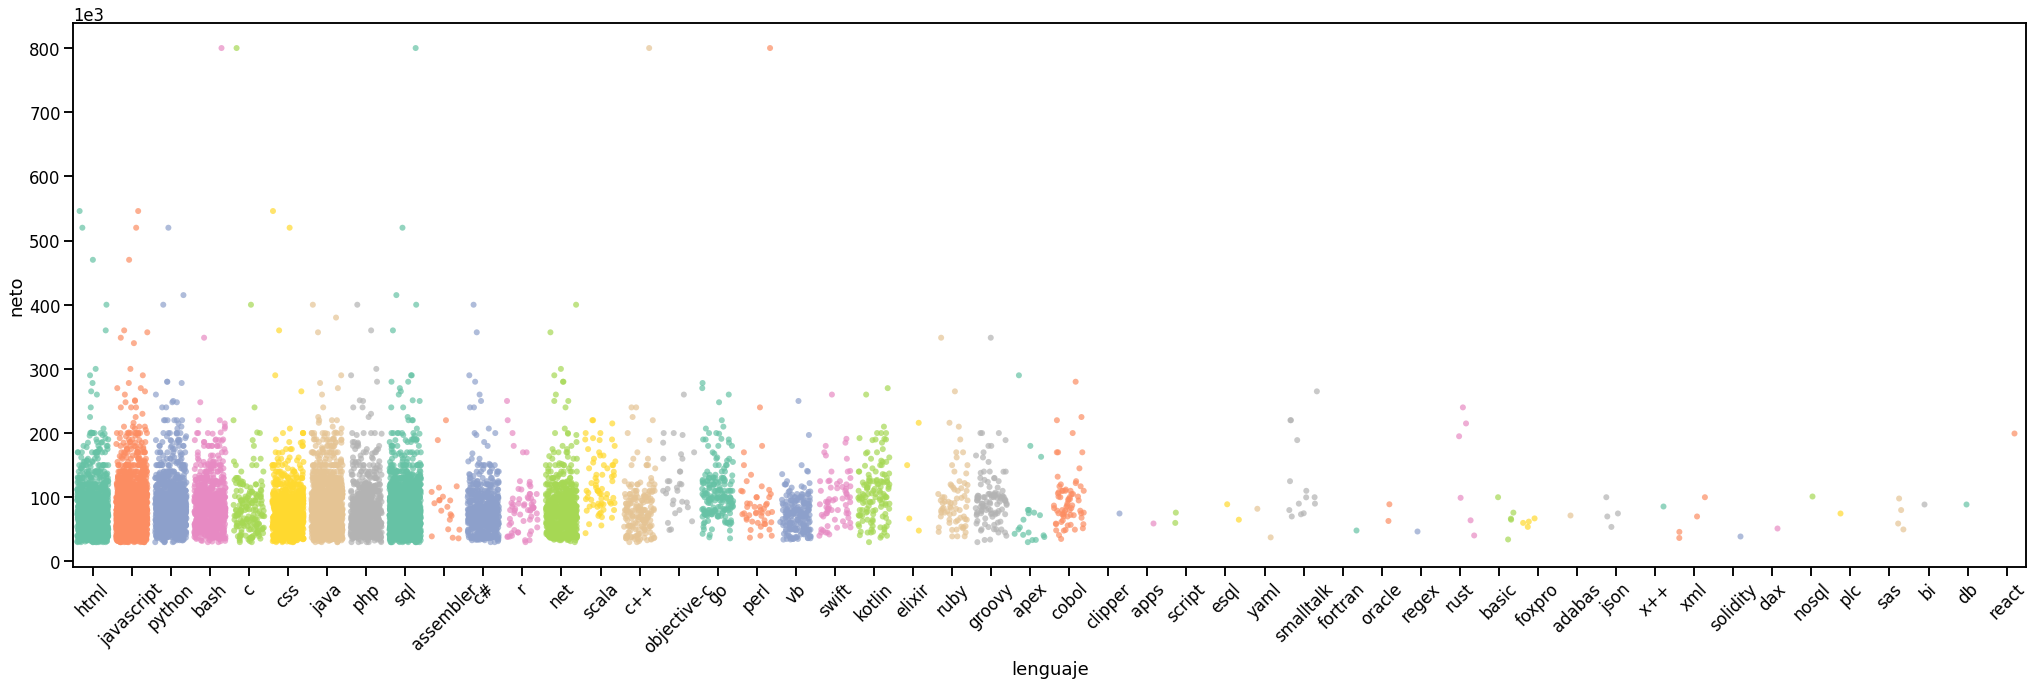

In [ ]:
#pesificados.plot.scatter(x='lenguaje', y='neto', figsize=(35,10))
plt.subplots(figsize=(35,10))
sns.stripplot(y=pesificados_full['neto'], 
              x=pesificados_full['lenguaje'], 
              jitter=0.4, 
              alpha=.7, 
              palette='Set2', 
              size=6, 
              )
plt.ticklabel_format(style='sci',axis='y',scilimits=(3,3))
#plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45);

<Figure size 2880x2160 with 0 Axes>

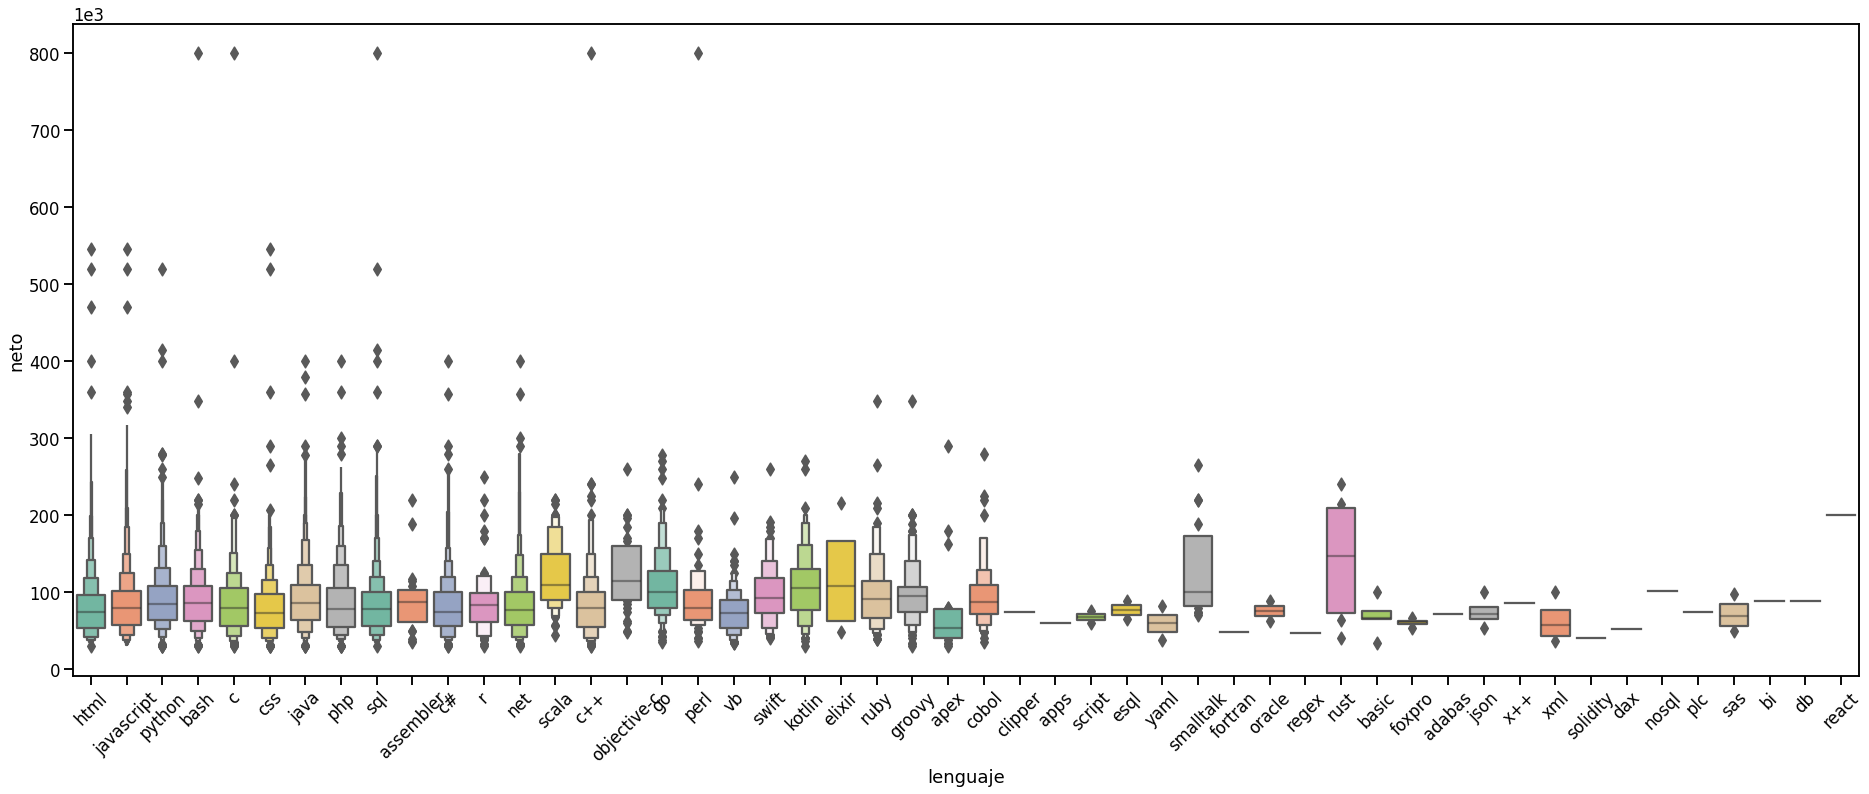

In [ ]:
plt.figure(figsize=(40,30))
#sns.boxenplot(x='neto', y='lenguaje', data=pesificados)
plt.figure(figsize=(32,12))
sns.boxenplot(y='neto', x='lenguaje', data=pesificados_full, palette='Set2',)
plt.ticklabel_format(style='sci',axis='y',scilimits=(3,3))
plt.xticks(rotation=45);
#sns.boxplot(x='neto', y='lenguaje', data=pesificados)

### Frecuencia por lenguaje, según sueldo

A tener en cuenta:
Dentro del grupo estuvimos viendo que la consigna de analizar la relación entre la cantidad de lenguajes y el sueldo podría llevar a resultados poco certeros, ya que por ejemplo si una persona gana mucho dinero y programa en HTML, no podemos afirmar que esto sea una relación directa: en muchos casos las personas programan en varios lenguajes y no podemos saber cuál es el lenguaje por el cual ganan más dinero.

In [ ]:
frec_lenguajes = frec_leng_pesificados_full.merge(frec_leng_dolarizados, left_on='lenguaje', right_on='lenguaje', how='right')
frec_lenguajes.rename(columns={"frecuencia_x": "frec_pesos", "frecuencia_y": "frec_dolares"}, inplace = True)

In [ ]:
frec_lenguajes["indice_dolarizacion"] = frec_lenguajes.frec_dolares / (frec_lenguajes.frec_dolares + frec_lenguajes.frec_pesos) 
frec_lenguajes.sort_values("indice_dolarizacion", ascending = False)

,lenguaje,frec_pesos,frec_dolares,indice_dolarizacion
23,rust,6,4,0.400000
27,yaml,2,1,0.333333
26,script,2,1,0.333333
24,elixir,4,2,0.333333
12,ruby,69,30,0.303030
18,objective-c,31,9,0.225000
15,scala,69,18,0.206897
22,assembler,20,5,0.200000
10,go,185,37,0.166667
14,groovy,105,21,0.166667


En la columna `indice_dolarizacion` se puede ver la probabilidad de tener un sueldo en dólares sabiendo determinado lenguaje. 

El problema es que algunos lenguajes tienen muy pocas ocurrencias para considerar a ese dato relevante. 

Por lo tanto, deberíamos tomar un mínimo para decir que la muestra es lo suficientemente relevante. 

El límite inferior posible podemos tomarlo del siguiente describe.



In [ ]:
frec_lenguajes.describe()

,frec_pesos,frec_dolares,indice_dolarizacion
count,28.000000,28.000000,28.000000
mean,402.357143,48.750000,0.161383
std,505.406856,58.405115,0.097278
min,2.000000,1.000000,0.028169
25%,59.000000,6.000000,0.099113
50%,152.500000,21.500000,0.120606
75%,623.250000,70.250000,0.201724
max,1682.000000,232.000000,0.400000


In [ ]:
pesificados.columns

Index(['lenguaje', 'experiencia', 'anios_en_compania',
       'anios_en_posicion_actual', 'bruto', 'neto', 'dolarizado',
       'work_contract_type', 'lang_count'],
      dtype='object')

###Visualizamos los lenguajes y los sueldos que corresponden a cada uno

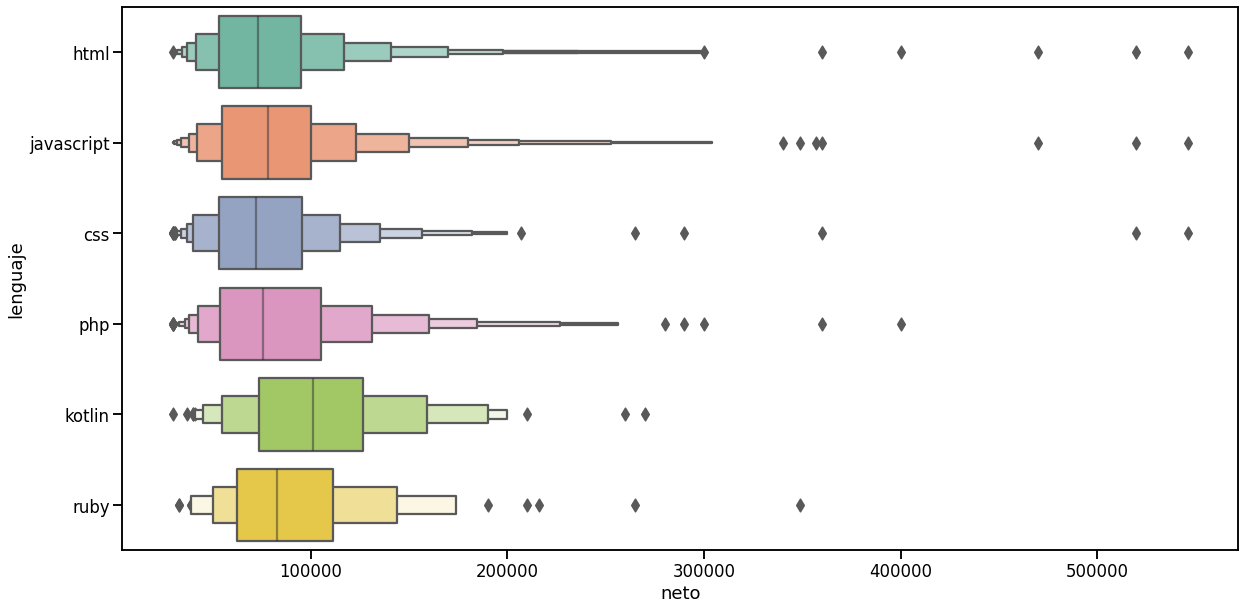

In [ ]:
sub_df_web = pesificados[pesificados['lenguaje'].isin(['elm','dart','ruby','kotlin','typescript','javascript', 'html', 'css', 'php'])]
plt.figure(figsize=(20,10))
sns.boxenplot(x='neto', y='lenguaje', data=sub_df_web, palette='Set2')


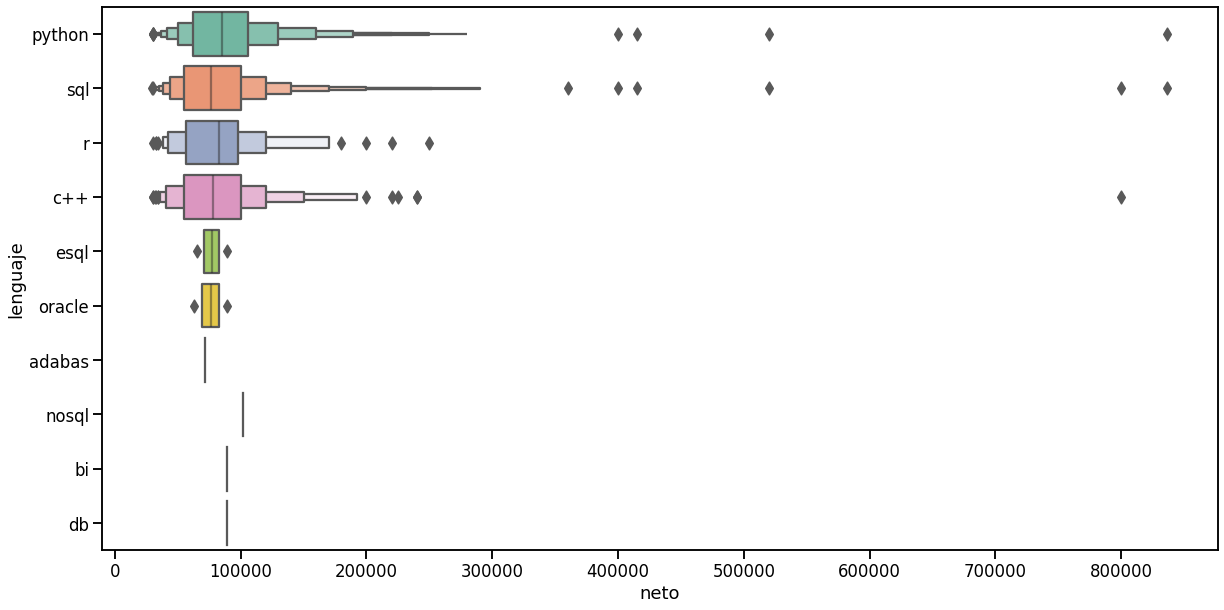

In [ ]:
sub_df_analisis = pesificados[pesificados['lenguaje'].isin(['python','r','mongodb','sql','nosql','bi','sql', 'c++', 'db', 'esql', 'oracle', 'adabas','neto'])]

plt.figure(figsize=(20,10))
sns.boxenplot(x='neto', y='lenguaje', data=sub_df_analisis, palette='Set2')

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




Herramientas visuales y modelos posibles:

* gráfico de dispersión,
* gráfico de barras contabilizando por segmentos (cuántos ganan entre tanto y tanto),
* boxenplot para ver también la distribución con respecto a los principales cuantiles y comparar medias entre distintas categorías,
* describe (para ver y comparar mínimo, máximo, media y desviación estándar).
* Q-Q plots: evita los problemas que se generan con los binnes en los histogramas. A diferencia del boxplot, esta visualización es bidimensional y esto nos permite ver la distribución de los puntos, cómo se acumulan, la dispersión de los mismos, etc.

### Análisis entre la edad y el sueldo neto
(numérica vs numérica)

In [ ]:
df_valido.profile_age.describe()

count    4919.000000
mean       32.677170
std        10.453516
min        18.000000
25%        27.000000
50%        31.000000
75%        37.000000
max       567.000000
Name: profile_age, dtype: float64

In [ ]:
df_valido.profile_age.quantile(0.99)

54.0

Para el análisis relacionado con la edad, filtraremos las edades que no tienen sentido. Sabiendo que una persona se jubila entre los 60 y 65 años, nos quedaremos con las menores a este número.

In [ ]:
edad_filtrada = df_valido[df_valido.profile_age < 65]

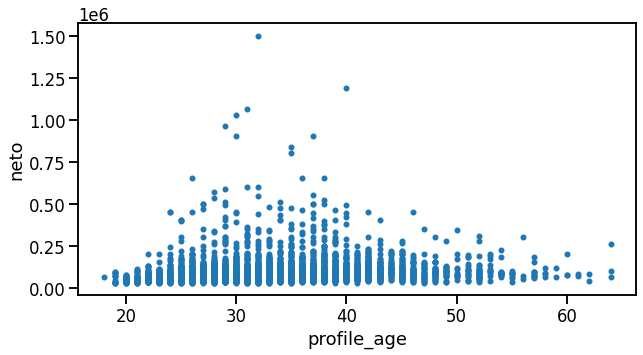

In [ ]:
edad_filtrada.plot.scatter(x='profile_age', y='neto', figsize=(10,5));

In [ ]:
def filtrar_por_cuantil(df, q):
  return df[df.neto < df.neto.quantile(q)]

def rangos_etarios(df, inferior, superior):
  return df[(df.profile_age >= inferior) & (df.profile_age < superior)]

def filtrar_salario_edad(df, inferior, superior, q):
  return filtrar_por_cuantil(rangos_etarios(df, inferior, superior), q)

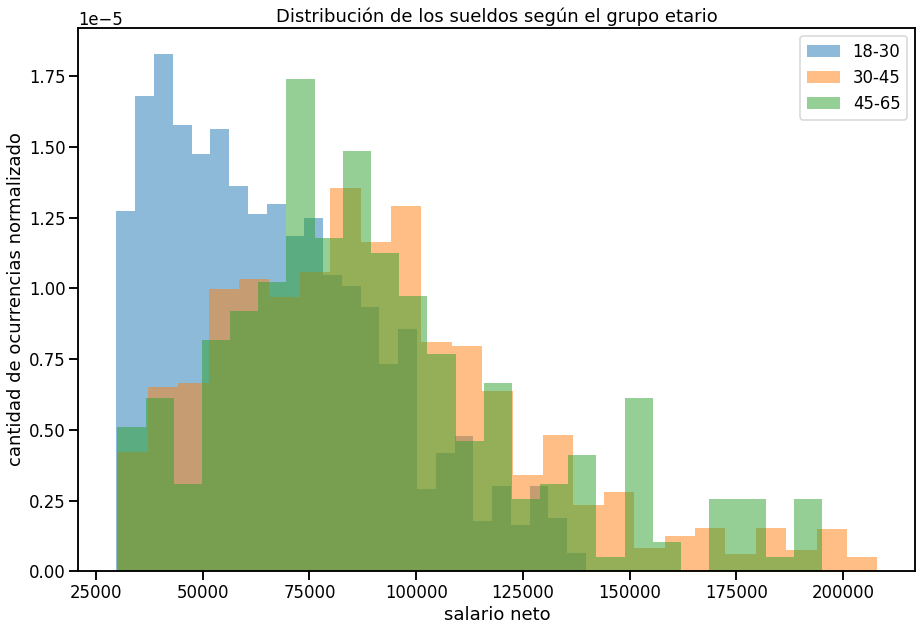

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(filtrar_salario_edad(edad_filtrada, 18, 30, 0.95).neto, bins=25, alpha=0.5, label="18-30", density=True)
plt.hist(filtrar_salario_edad(edad_filtrada, 30, 45, 0.95).neto, bins=25, alpha=0.5, label="30-45", density=True)
plt.hist(filtrar_salario_edad(edad_filtrada, 45, 66, 0.95).neto, bins=25, alpha=0.5, label="45-65", density=True)
plt.xlabel("salario neto")
plt.ylabel("cantidad de ocurrencias normalizado")
plt.title("Distribución de los sueldos según el grupo etario")
plt.legend();

**Conclusión**

Podemos ver cómo la distribución del salario para los jóvenes entre 30 y 45 años es similar a la de la gente entre 45 y 65 años; mientras que la del rango más joven (entre 18 y 30) tienen una acumulación en los valores más bajos, disminuyendo su media con respecto al resto.
Esto es razonable, debido a que uno esperaría que el salario se incremente con los años de experiencia. 
A su vez, no vemos ningún valor de 18-30 en los sueldos más altos de todos, porque son sueldos más comunes en rangos gerenciales/sr.

### Análisis entre el género y el sueldo
(categórica vs numérica)

In [ ]:
bars = df_valido.groupby('profile_gender').mean().neto

In [ ]:
bars

profile_gender
Hombre    96493.766958
Mujer     76141.498849
Otros     94645.833333
Name: neto, dtype: float64

In [ ]:
bars

,sueldo_neto_promedio,cantidad_filas
profile_gender,,
Hombre,96493.766958,4139
Mujer,76141.498849,756
Otros,94645.833333,24


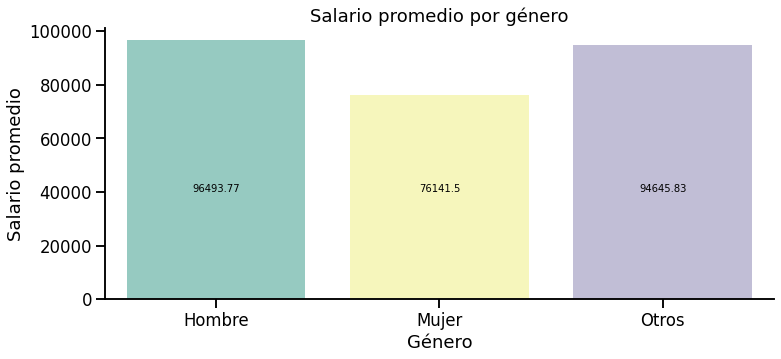

In [ ]:
f, ax = plt.subplots(figsize=(12,5))
sns.barplot(x=bars.index, y=bars.sueldo_neto_promedio, palette='Set3', ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Género')
plt.ylabel('Salario promedio')
plt.title("Salario promedio por género")

for i, v in enumerate([round(val,2) for val in bars.sueldo_neto_promedio]):
  plt.text(i, 40e3, str(v), horizontalalignment="center")


In [ ]:
bars = df_valido.groupby('profile_gender').agg(sueldo_neto_promedio=('neto','mean'), cantidad_filas=('neto','count'))
bars

,sueldo_neto_promedio,cantidad_filas
profile_gender,,
Hombre,96493.766958,4139
Mujer,76141.498849,756
Otros,94645.833333,24


**Conclusión**

Si bien el gráfico muestra que el salario promedio de las mujeres está bastante por debajo de los hombres, y a la vez la categoría "Otros" tiene un salario apenas por debajo de la categoría "Hombres", hay que considerar que en los datos originales hay muchísimas menos mujeres que hombres, y que tenemos una cantidad insignificante de otros. 
Además, tampoco sabemos cómo está construída esta última categoría: no es exhaustiva y no sabemos si se refiere a varones trans, mujeres trans, personas no binarias, etc. 

### Años de experiencia vs sueldo dolarizado

(numerica vs. categorica)

In [ ]:
df_lang["dolarizado"] = df_lang.dolarizado.fillna("Mi sueldo está en pesos")
df_lang.head(2)

,lenguaje,tools_programming_languages,experiencia,anios_en_compania,anios_en_posicion_actual,bruto,neto,dolarizado,work_contract_type,cured_programming_languages,lang_count
1,html,"HTML, Javascript, Python",5.0,2.0,2.0,79000.0,63000.0,Mi sueldo está en pesos,Full-Time,"[html, javascript, python]",3
1,javascript,"HTML, Javascript, Python",5.0,2.0,2.0,79000.0,63000.0,Mi sueldo está en pesos,Full-Time,"[html, javascript, python]",3


In [ ]:
df_valido["dolarizado"] = df_valido.dolarizado.fillna("Mi sueldo está en pesos")

Text(0.5, 1.0, 'Cantidad de sueldos dolarizados/pesificados por cantidad de lenguajes conocidos')

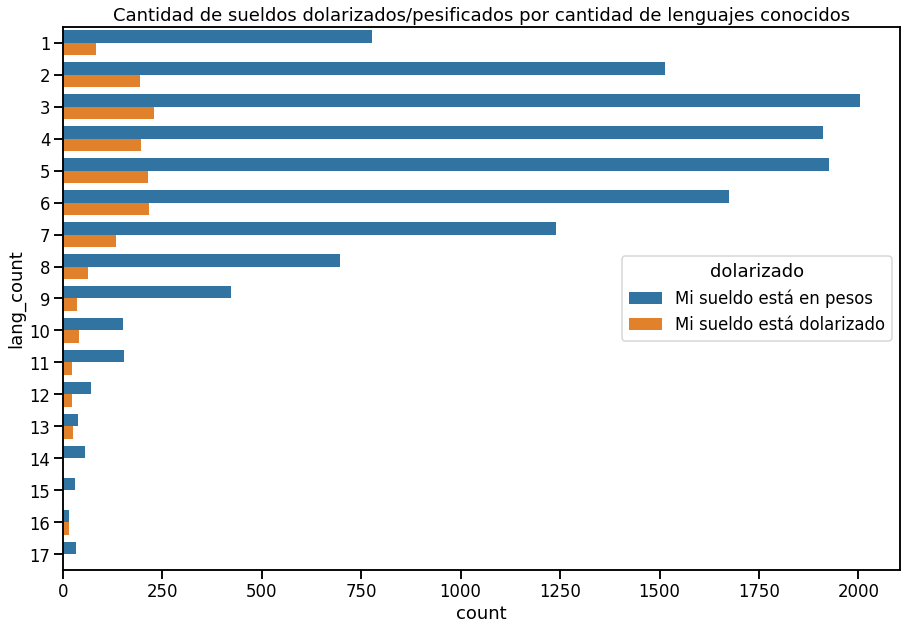

In [ ]:
plt.subplots(figsize=(15,10))
sns.countplot(data = df_lang, y = "lang_count", hue = "dolarizado")
plt.title("Cantidad de sueldos dolarizados/pesificados por cantidad de lenguajes conocidos")


In [ ]:
experiencia_filtrada = df_valido[df_valido.experiencia <= 44]
experiencia_filtrada["experiencia_binneada"] = pd.cut(experiencia_filtrada.experiencia, [0, 10, 20, 30, 40, 50], labels = [5, 15, 25, 35, 45])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
 pd.cut(experiencia_filtrada.experiencia,  [0, 10, 20, 30, 40, 50], labels = [5, 15, 25, 35, 45])

0        5
1        5
2        5
3       15
4        5
        ..
6088    15
6089     5
6090    15
6091    15
6094     5
Name: experiencia, Length: 4918, dtype: category
Categories (5, int64): [5 < 15 < 25 < 35 < 45]

In [ ]:
experiencia_filtrada.experiencia.min()

0.0

Text(0.5, 1.0, 'Distribución de sueldos según los años de experiencia')

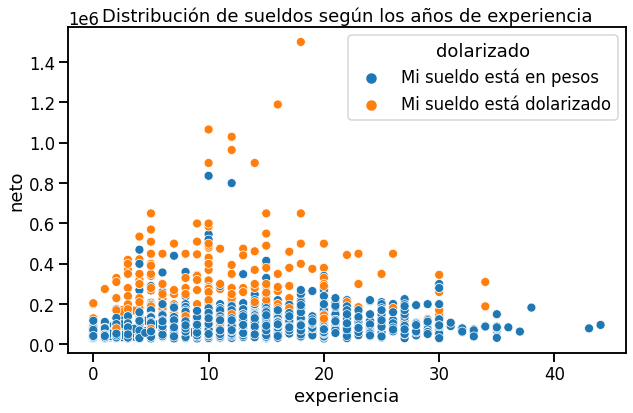

In [ ]:
plt.subplots(figsize=(10,6))
sns.scatterplot(x = "experiencia", y = "neto", hue = "dolarizado", data = experiencia_filtrada)
plt.title("Distribución de sueldos según los años de experiencia")

Text(0.5, 1.0, 'Cantidad de sueldos dolarizados/pesificados acorde al rango de años de experiencia')

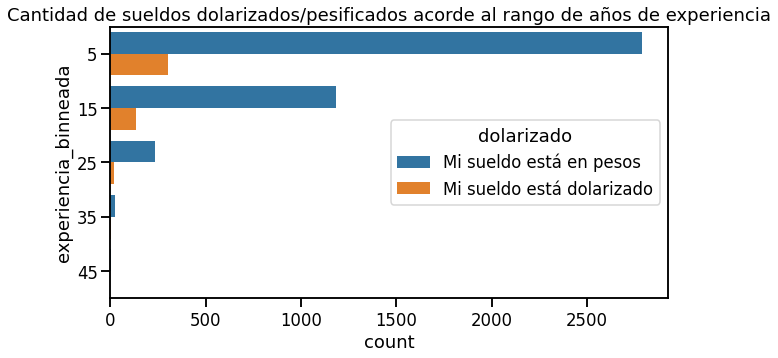

In [ ]:
plt.subplots(figsize=(10,5))
sns.countplot(data = experiencia_filtrada, y = "experiencia_binneada", hue = "dolarizado")
plt.title("Cantidad de sueldos dolarizados/pesificados acorde al rango de años de experiencia")


**Conclusión**

Vemos que hay gente con "pocos años de experiencia" que tienden a trabajar más con sueldos dolarizados.
Esto puede deberse a que:
* el trabajo para empresas de afuera surgió/se popularizó hace relativamente poco, con lo que la búsqueda favorecería a la gente con menos años de experiencia, mientras que la gente con más años se mantiene en la misma empresa y/o con sueldos en pesos.
* los pagos mixtos no están considerados. 
* si alguien fijó el sueldo a dólares, no lo está discriminando.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



In [ ]:
df[["salary_monthly_BRUTO", "salary_monthly_NETO"]].corr()

,salary_monthly_BRUTO,salary_monthly_NETO
salary_monthly_BRUTO,1.000000,0.833335
salary_monthly_NETO,0.833335,1.000000


Previo a la limpieza, en el dataframe original de por sí hay un índice de correlación alto. 

Veremos cómo se modifica este número con las limpiezas posteriores, contemplando también a la columna de retenciones generada.

In [ ]:
df_valido[["bruto", "neto", "retenciones"]].corr()

,bruto,neto,retenciones
bruto,1.000000,0.979705,0.794253
neto,0.979705,1.000000,0.656344
retenciones,0.794253,0.656344,1.000000


In [ ]:
filtered_df[["bruto", "neto"]].corr()

,bruto,neto
bruto,1.000000,0.979411
neto,0.979411,1.000000


## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
df_valido.profile_studies_level.value_counts()

Universitario    3347
Terciario         935
Secundario        345
Posgrado          267
Doctorado          19
Posdoctorado        4
Primario            2
Name: profile_studies_level, dtype: int64

Elegiría universitario y terciario, ya que es más probable que tengan poca gente en común (a diferencia de, por ejemplo, universitario y posgrado, donde una persona de posgrado abarca obligatoriamente ambas categorías).

In [ ]:
def filtrar_nivel(nivel):
  return df_valido[df_valido.profile_studies_level == nivel]

universitarios = filtrar_nivel("Universitario")
terciarios = filtrar_nivel("Terciario")

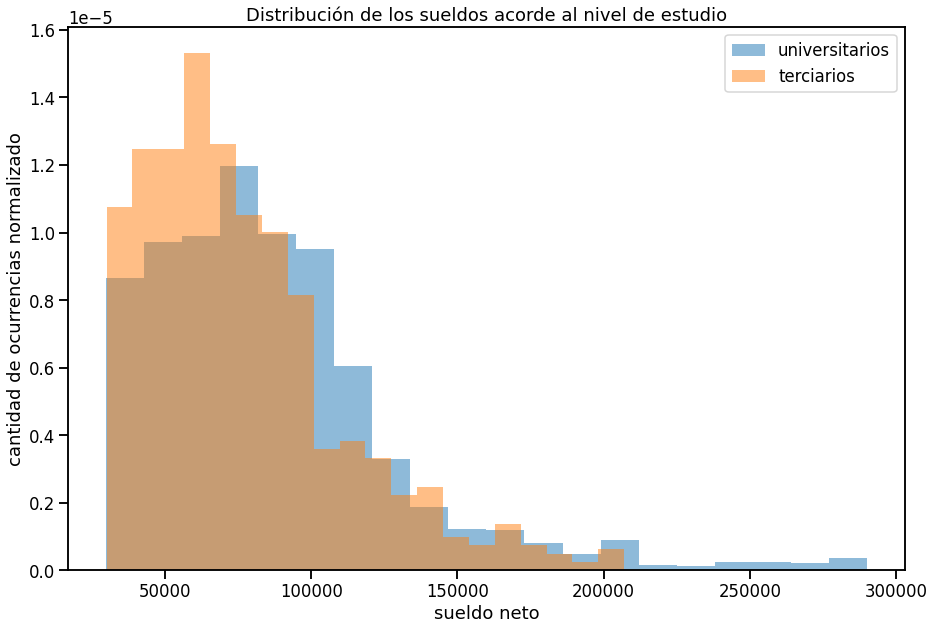

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(filtrar_por_cuantil(universitarios, 0.98).neto, bins=20, alpha=0.5, label="universitarios", density=True)
plt.hist(filtrar_por_cuantil(terciarios, 0.98).neto, bins=20, alpha=0.5, label="terciarios", density=True)
plt.xlabel("sueldo neto")
plt.ylabel("cantidad de ocurrencias normalizado")
plt.title("Distribución de los sueldos acorde al nivel de estudio")
plt.legend();

In [ ]:
correlacion = pd.DataFrame()
correlacion["sueldos_universitarios"] = filtrar_por_cuantil(universitarios, 0.98).neto
correlacion["sueldos_terciarios"] = filtrar_por_cuantil(terciarios, 0.98).neto.reset_index(drop = True)

In [ ]:
correlacion.corr()

,sueldos_universitarios,sueldos_terciarios
sueldos_universitarios,1.000000,0.022552
sueldos_terciarios,0.022552,1.000000


In [ ]:
correlacion.describe()

,sueldos_universitarios,sueldos_terciarios
count,3277.000000,512.000000
mean,86693.128923,75631.033867
std,42069.450311,33689.529823
min,29800.000000,30000.000000
25%,57000.000000,50000.000000
50%,80000.000000,68460.000000
75%,105000.000000,91000.000000
max,290000.000000,200000.000000


**Conclusión**

Si bien vemos que el índice de correlación entre los sueldos de cada categoría es muy bajo, esto es engañoso porque no tenemos forma de cruzar los datos de una manera realista; no sabemos si una persona que completó "universitario" también estudió en un nivel terciario. 
No estamos comparando variables numéricas correspondientes a una misma realización, sino que son distintas realizaciones agrupadas aleatoriamente. 

Comparando los histogramas, parecen ser similares, aunque la media de los terciarios está más a la izquierda que para universitarios, con lo que podríamos deducir que los universitarios ganan mejores sueldos en promedio. 
A su vez, ambos histogramas presentan una cola hacia la derecha. 

Para mejorar este análisis, pediríamos que las personas completen todos sus niveles de estudio, y no solo el último. 

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Elegimos las siguientes variables: años de experiencia y sueldo vs work_contract_type

Filtramos el tipo de contrato por Full Time, Part Time y Freelance ya que las categorías de "Remoto" y "Tercearizado" pueden ser cualquiera de las tres anteriores.

Y sacamos los outliers de la experiencia.


In [ ]:
experiencia_filtrada.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'experiencia', 'anios_en_compania', 'anios_en_posicion_actual',
       'work_people_in_charge_of', 'profile_studies_level',
       'profile_studies_level_state', 'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type', 'bruto', 'neto',
       'dolarizado', 'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inflation_adjustment_2020',
       'salary_month_last_inflation_adjustmen

In [ ]:
tipo_de_contrato = experiencia_filtrada[experiencia_filtrada['work_contract_type'].isin(['Full-Time', 'Part-Time', 'Freelance'])]

In [ ]:
tipo_de_contrato = tipo_de_contrato[tipo_de_contrato['neto']<=tipo_de_contrato['neto'].quantile(0.98)]

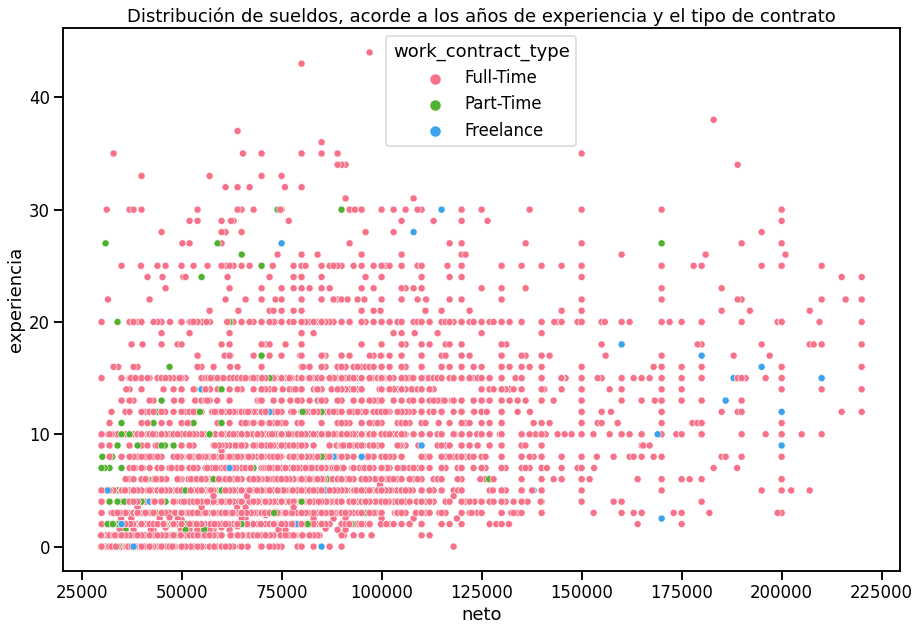

In [ ]:
plt.subplots(figsize=(15,10))
plt.title("Distribución de sueldos, acorde a los años de experiencia y el tipo de contrato")
sns.scatterplot(data = tipo_de_contrato, 
                y = "experiencia", 
                x= "neto", 
                hue = "work_contract_type",
                palette="husl",
                s=50               )

**Conclusión**

Podemos ver que predominan los contratos Full Time en el área de tecnología. Podemos ver que muchos de los trabajadores freelance no tienen tanta experiencia pero aún así ganan buenos sueldos. No podemos sacar otras conclusiones certeras de este gráfico.